In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = 'retina'

In [4]:
from rec_to_binaries.read_binaries import readTrodesExtractedDataFile

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### .time directory

+ `.continuoustime.dat` lists the timestamp of every entry in the rec file, and include systime when that is enabled.
+ `.time.dat` lists the start and end time of the epoch
+ `.exporttime.log` is the log from the C function used to create `continuoustime.dat` and `time.dat` files. It also includes the arguments used to create the function.

In [6]:
readTrodesExtractedDataFile(
    '../test_data/lotus/preprocessing/20190902/20190902_lotus_06_r3.time/20190902_lotus_06_r3.continuoustime.dat')

/home/edeno/Documents/Github/rec_to_binaries/rec_to_binaries/read_binaries.py:70: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  return np.dtype(typearr)


{'description': 'Continuous time periods (start and end times)',
 'byte_order': 'little endian',
 'original_file': '20190902_lotus_06_r3.rec',
 'clockrate': '30000',
 'system_time_at_creation': '1567459146943',
 'timestamp_at_creation': '390829088',
 'trodes_version': '1.8.2',
 'compile_date': 'May 16 2019',
 'compile_time': '10:32:19',
 'qt_version': '5.9.8',
 'commit_tag': 'heads/Release_1.8.2-0-g9a3e37c',
 'controller_firmware': '0.0',
 'headstage_firmware': '3.9',
 'autosettle': '0',
 'smartref': '0',
 'gyro': '0',
 'accelerometer': '0',
 'magnetometer': '0',
 'time_offset': '0',
 'fields': '<trodestime uint32><systime int64>',
 'data': array([(390923532, 1567459150091663430), (390923533, 1567459150091671120),
        (390923534, 1567459150091674111), ...,
        (443082985, 1567460888733625293), (443082986, 1567460888733629636),
        (443082987, 1567460888733631849)],
       dtype=[('trodestime', '<u4'), ('systime', '<i8')])}

In [4]:
continuous_time = readTrodesExtractedDataFile(
    '../test_data/lotus/preprocessing/20190902/20190902_lotus_06_r3.time/20190902_lotus_06_r3.continuoustime.dat')
sampling_rate = float(continuous_time['Clockrate'])
continuous_time = pd.DataFrame(continuous_time['data'])
seconds = continuous_time.systime / 1E9

In [5]:
ct = pd.to_datetime(continuous_time.systime.values)
ct

DatetimeIndex(['2019-09-02 21:19:10.091663430',
               '2019-09-02 21:19:10.091671120',
               '2019-09-02 21:19:10.091674111',
               '2019-09-02 21:19:10.091676962',
               '2019-09-02 21:19:10.091679726',
               '2019-09-02 21:19:10.091682421',
               '2019-09-02 21:19:10.091685027',
               '2019-09-02 21:19:10.091687653',
               '2019-09-02 21:19:10.091690154',
               '2019-09-02 21:19:10.091742274',
               ...
               '2019-09-02 21:48:08.733329170',
               '2019-09-02 21:48:08.733422570',
               '2019-09-02 21:48:08.733426587',
               '2019-09-02 21:48:08.733428774',
               '2019-09-02 21:48:08.733522447',
               '2019-09-02 21:48:08.733526586',
               '2019-09-02 21:48:08.733528880',
               '2019-09-02 21:48:08.733625293',
               '2019-09-02 21:48:08.733629636',
               '2019-09-02 21:48:08.733631849'],
              dtype=

In [452]:
np.diff(ct) / np.timedelta64(1, 's')

array([7.6900e-06, 2.9910e-06, 2.8510e-06, ..., 9.6413e-05, 4.3430e-06,
       2.2130e-06])

In [6]:
(ct - pd.Timestamp("1970-01-01")) // pd.Timedelta('1ns'), continuous_time.systime.values

(Int64Index([1567459150091663430, 1567459150091671120, 1567459150091674111,
             1567459150091676962, 1567459150091679726, 1567459150091682421,
             1567459150091685027, 1567459150091687653, 1567459150091690154,
             1567459150091742274,
             ...
             1567460888733329170, 1567460888733422570, 1567460888733426587,
             1567460888733428774, 1567460888733522447, 1567460888733526586,
             1567460888733528880, 1567460888733625293, 1567460888733629636,
             1567460888733631849],
            dtype='int64', length=52159456),
 array([1567459150091663430, 1567459150091671120, 1567459150091674111, ...,
        1567460888733625293, 1567460888733629636, 1567460888733631849]))

In [7]:
pd.Timestamp(continuous_time.systime.values[0], tz='US/Pacific')

Timestamp('2019-09-02 14:19:10.091663430-0700', tz='US/Pacific')

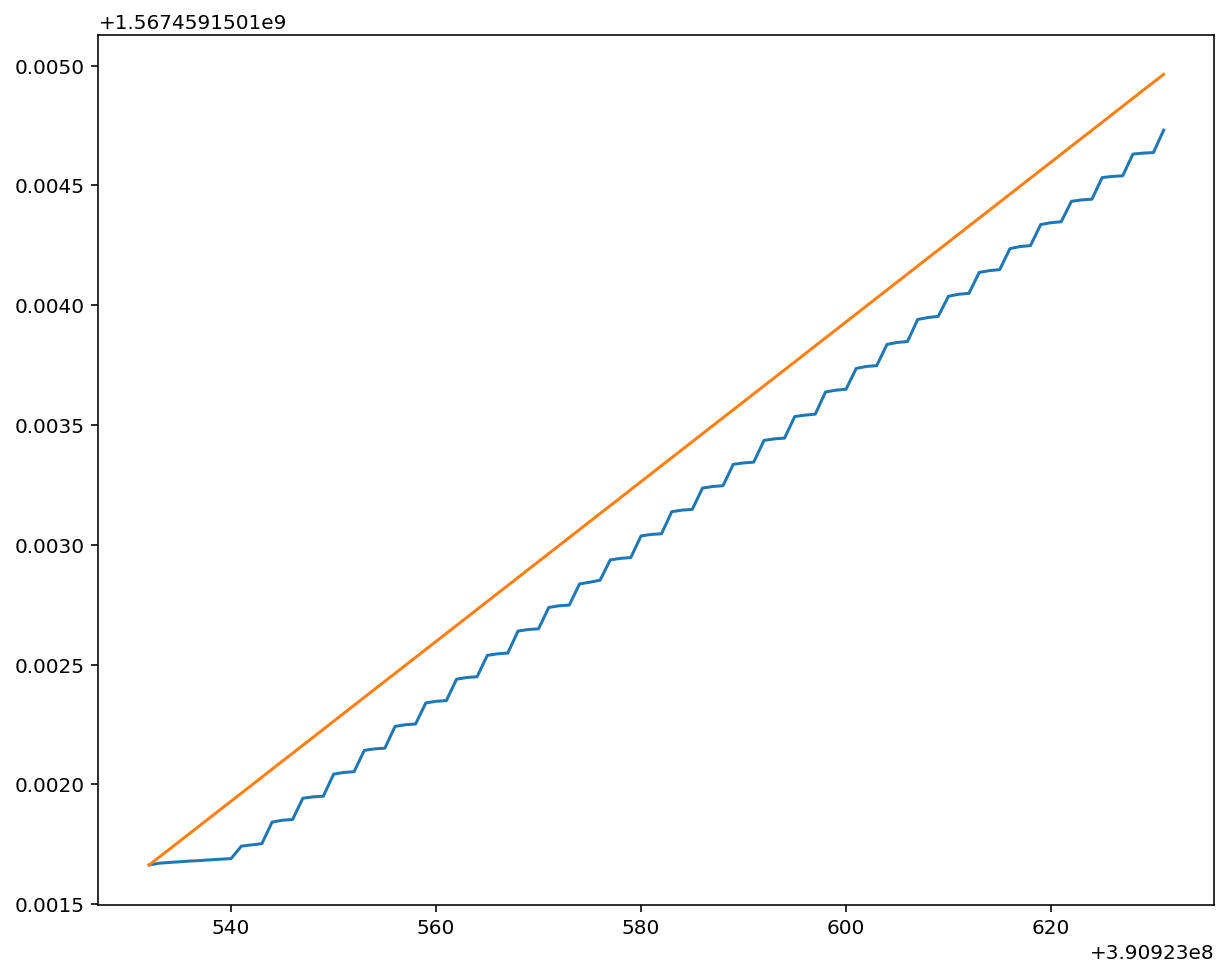

In [8]:
plt.figure(figsize=(10, 8))
n_samples = 100
plt.plot(continuous_time.trodestime.values[:n_samples], seconds[:n_samples])
plt.plot(continuous_time.trodestime.values[:n_samples],
         seconds[0] + np.arange(n_samples) / sampling_rate)

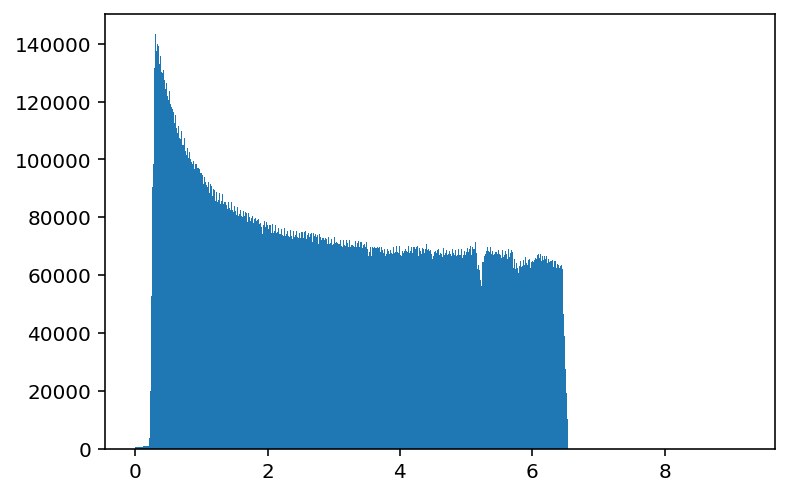

In [9]:
ideal = (seconds[0] + np.arange(continuous_time.systime.values.size) / sampling_rate)
plt.hist(np.abs(seconds - ideal) * 1000, bins=1000);

In [10]:
np.mean(np.diff(seconds) >= 2 / sampling_rate)

0.3185429564016725

In [11]:
np.max(np.diff(seconds)) * 1000

15.672922134399414

In [12]:
np.diff(seconds) * 1000

array([0.00762939, 0.00309944, 0.00286102, ..., 0.09655952, 0.00429153,
       0.00214577])

Text(0.5, 0, 'Difference between time samples (ms)')

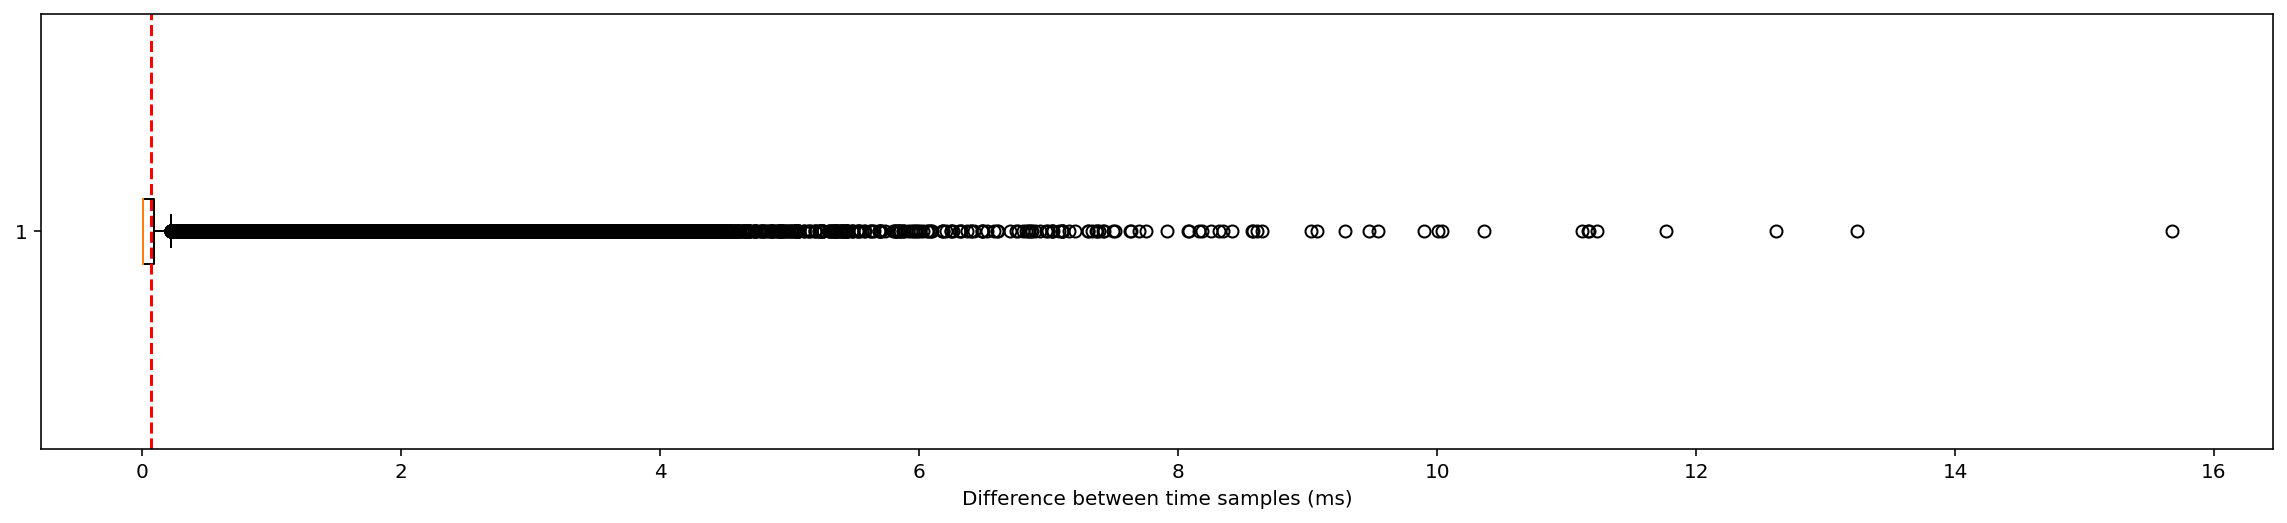

In [13]:
plt.figure(figsize=(20, 4))
plt.boxplot(np.diff(seconds) * 1000, vert=False);
plt.axvline(1000 * 2 / sampling_rate, color='red', linestyle='--')
plt.xlabel('Difference between time samples (ms)')

In [14]:
np.mean(np.diff(continuous_time.trodestime) > 1)

0.0

In [15]:
np.max(np.diff(continuous_time.trodestime))

1

In [16]:
is_adjacent_sample = (np.diff(continuous_time.trodestime) == 1)
adjusted_sampling_rate = np.mean(np.diff(seconds))

In [17]:
pd.Timestamp(continuous_time.systime[0])

Timestamp('2019-09-02 21:19:10.091663430')

In [20]:
pd.Timedelta(1/30000, unit='s')

Timedelta('0 days 00:00:00.000033')

In [21]:
pd.Timestamp(continuous_time.systime[0]) + pd.Timedelta(1/30000, unit='s')

Timestamp('2019-09-02 21:19:10.091696763')

In [23]:
pd.period_range?

Signature: pd.period_range(start=None, end=None, periods=None, freq=None, name=None) -> pandas.core.indexes.period.PeriodIndex
Docstring:
Return a fixed frequency PeriodIndex.

The day (calendar) is the default frequency.

Parameters
----------
start : str or period-like, default None
    Left bound for generating periods.
end : str or period-like, default None
    Right bound for generating periods.
periods : int, default None
    Number of periods to generate.
freq : str or DateOffset, optional
    Frequency alias. By default the freq is taken from `start` or `end`
    if those are Period objects. Otherwise, the default is ``"D"`` for
    daily frequency.
name : str, default None
    Name of the resulting PeriodIndex.

Returns
-------
PeriodIndex

Notes
-----
Of the three parameters: ``start``, ``end``, and ``periods``, exactly two
must be specified.

To learn more about the frequency strings, please see `this link
<https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.h

In [33]:
filename = '../test_data/lotus/preprocessing/20190902/20190902_lotus_06_r3.time/20190902_lotus_06_r3.continuoustime.dat'

with open(filename, 'rb') as f:
    for line in f:
        print(line)
        print(line.decode('ascii').strip())

b'<Start settings>\n'
<Start settings>
b'Description: Continuous time periods (start and end times)\n'
Description: Continuous time periods (start and end times)
b'Byte_order: little endian\n'
Byte_order: little endian
b'Original_file: 20190902_lotus_06_r3.rec\n'
Original_file: 20190902_lotus_06_r3.rec
b'Clockrate: 30000\n'
Clockrate: 30000
b'System_time_at_creation: 1567459146943\n'
System_time_at_creation: 1567459146943
b'Timestamp_at_creation: 390829088\n'
Timestamp_at_creation: 390829088
b'Byte_order: little endian\n'
Byte_order: little endian
b'Original_file: 20190902_lotus_06_r3.rec\n'
Original_file: 20190902_lotus_06_r3.rec
b'Clockrate: 30000\n'
Clockrate: 30000
b'Trodes_version: 1.8.2\n'
Trodes_version: 1.8.2
b'Compile_date: May 16 2019\n'
Compile_date: May 16 2019
b'Compile_time: 10:32:19\n'
Compile_time: 10:32:19
b'QT_version: 5.9.8\n'
QT_version: 5.9.8
b'Commit_tag: heads/Release_1.8.2-0-g9a3e37c\n'
Commit_tag: heads/Release_1.8.2-0-g9a3e37c
b'Controller_firmware: 0.0\n'
Con

UnicodeDecodeError: 'ascii' codec can't decode byte 0xd1 in position 7: ordinal not in range(128)

In [14]:
from rec_to_binaries.read_binaries import parse_dtype

filename = '../test_data/lotus/preprocessing/20190902/20190902_lotus_06_r3.time/20190902_lotus_06_r3.continuoustime.dat'

with open(filename, 'rb') as file:
    # Check if first line is start of settings block
    if file.readline().decode('ascii').strip() != '<Start settings>':
        raise Exception("Settings format not supported")
    fieldsText = {}
    for line in file:
        # Read through block of settings
        line = line.decode('ascii').strip()
        # filling in fields dict
        if line != '<End settings>':
            settings_name, setting = line.split(': ')
            fieldsText[settings_name.lower()] = setting
        # End of settings block, signal end of fields
        else:
            break
    # Reads rest of file at once, using dtype format generated by parse_dtype()
    dtype = parse_dtype(fieldsText['fields'])
    fieldsText['data'] = np.fromfile(
        file, dtype=dtype)

In [15]:
dtype

dtype([('trodestime', '<u4'), ('systime', '<i8')])

In [44]:
data_file = readTrodesExtractedDataFile(
    '../test_data/lotus/preprocessing/20190902/20190902_lotus_06_r3.time/20190902_lotus_06_r3.continuoustime.dat')
data_file

/home/edeno/Documents/Github/rec_to_binaries/rec_to_binaries/read_binaries.py:70: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  return np.dtype(typearr)


{'Description': ' Continuous time periods (start and end times)',
 'Byte_order': ' little endian',
 'Original_file': ' 20190902_lotus_06_r3.rec',
 'Clockrate': ' 30000',
 'System_time_at_creation': ' 1567459146943',
 'Timestamp_at_creation': ' 390829088',
 'Trodes_version': ' 1.8.2',
 'Compile_date': ' May 16 2019',
 'Compile_time': ' 10:32:19',
 'QT_version': ' 5.9.8',
 'Commit_tag': ' heads/Release_1.8.2-0-g9a3e37c',
 'Controller_firmware': ' 0.0',
 'Headstage_firmware': ' 3.9',
 'AutoSettle': ' 0',
 'SmartRef': ' 0',
 'Gyro': ' 0',
 'Accelerometer': ' 0',
 'Magnetometer': ' 0',
 'Time_offset': ' 0',
 'Fields': ' <trodestime uint32><systime int64>',
 'data': array([(390923532, 1567459150091663430), (390923533, 1567459150091671120),
        (390923534, 1567459150091674111), ...,
        (443082985, 1567460888733625293), (443082986, 1567460888733629636),
        (443082987, 1567460888733631849)],
       dtype=[('trodestime', '<u4'), ('systime', '<i8')])}

In [40]:
def write_trodes_extracted_datafile(filename, data_file):
"""

Parameters
----------
data_file : dict
filename : str

"""
    with open(filename, 'wb') as file:
        file.write('<Start settings>\n'.encode())
        for key, value in data_file.items():
            if key != 'data':
                line = f'{key}: {value}\n'.encode()
                file.write(line)
        file.write('<End settings>\n'.encode())
        file.write(data_file['data'].tobytes())

In [41]:
write_trodes_extracted_datafile('test.dat', data_file)
readTrodesExtractedDataFile('test.dat')

{'Description': 'Continuous time periods (start and end times)',
 'Byte_order': 'little endian',
 'Original_file': '20190902_lotus_06_r3.rec',
 'Clockrate': '30000',
 'System_time_at_creation': '1567459146943',
 'Timestamp_at_creation': '390829088',
 'Trodes_version': '1.8.2',
 'Compile_date': 'May 16 2019',
 'Compile_time': '10:32:19',
 'QT_version': '5.9.8',
 'Commit_tag': 'heads/Release_1.8.2-0-g9a3e37c',
 'Controller_firmware': '0.0',
 'Headstage_firmware': '3.9',
 'AutoSettle': '0',
 'SmartRef': '0',
 'Gyro': '0',
 'Accelerometer': '0',
 'Magnetometer': '0',
 'Time_offset': '0',
 'Fields': '<trodestime uint32><systime int64>',
 'data': array([(390923532, 1567459150091663430), (390923533, 1567459150091671120),
        (390923534, 1567459150091674111), ...,
        (443082985, 1567460888733625293), (443082986, 1567460888733629636),
        (443082987, 1567460888733631849)],
       dtype=[('trodestime', '<u4'), ('systime', '<i8')])}

In [179]:
from scipy.ndimage import label

continuous_time = readTrodesExtractedDataFile(
    '../test_data/lotus/preprocessing/20190902/20190902_lotus_06_r3.time/20190902_lotus_06_r3.continuoustime.dat')
sampling_rate = float(continuous_time['Clockrate'])
continuous_time = pd.DataFrame(continuous_time['data'])
seconds = continuous_time.systime / 1E9

label(np.diff(continuous_time.trodestime.values))

FileNotFoundError: [Errno 2] No such file or directory: '../test_data/lotus/preprocessing/20190902/20190902_lotus_06_r3.time/20190902_lotus_06_r3.continuoustime.dat'

In [69]:
fake_trodestime = continuous_time.trodestime.values

fake_trodestime[1:] = fake_trodestime[1:] + 1

array([390923535, 390923538, 390923539, ..., 443082989, 443082990,
       443082991], dtype=uint32)

In [63]:
np.allclose(fake_trodestime, continuous_time.trodestime.values)

True

In [64]:
fake_trodestime

array([390923533, 390923534, 390923537, ..., 443082988, 443082989,
       443082990], dtype=uint32)

In [55]:
label(fake_trodestime)

(array([1, 1, 1, ..., 1, 1, 1], dtype=int32), 1)

In [104]:
import os
import rec_to_binaries.trodes_data as td

data_dir = os.path.join(os.pardir, 'test_data')
animal = 'lotus'

animal_info = td.TrodesAnimalInfo(data_dir, animal)

extractor = td.ExtractRawTrodesData(animal_info)
raw_epochs_unionset = animal_info.get_raw_epochs_unionset()
if len(raw_epochs_unionset) == 0:
    logger.warning('No epochs found!')
raw_dates = animal_info.get_raw_dates()

raw_dates, raw_epochs_unionset

(['20190902'], {6})

In [105]:
from itertools import product

preprocessing_dir = animal_info.get_preprocessing_dir()

for date, epoch in product(raw_dates, raw_epochs_unionset):
    preprocessing_dir = animal_info.get_preprocessing_dir()
    task = os.path.basename(animal_info.get_raw_rec_path(date, epoch)[1]).split('.')[0].split('_')[-1]
    time_folder = os.path.join(preprocessing_dir, date, f"{date}_{animal}_{epoch:02d}_{task}.time")
    print(time_folder)

../test_data/lotus/preprocessing/20190902/20190902_lotus_06_r3.time


In [114]:
import glob

glob.glob(os.path.join(preprocessing_dir, '**', '*.continuoustime.dat'), recursive=True)

['../test_data/lotus/preprocessing/20190902/20190902_lotus_06_r3.time/20190902_lotus_06_r3.continuoustime.dat']

In [107]:
glob.glob?

Signature: glob.glob(pathname, *, recursive=False)
Docstring:
Return a list of paths matching a pathname pattern.

The pattern may contain simple shell-style wildcards a la
fnmatch. However, unlike fnmatch, filenames starting with a
dot are special cases that are not matched by '*' and '?'
patterns.

If recursive is true, the pattern '**' will match any files and
zero or more directories and subdirectories.
File:      ~/miniconda3/envs/rec_to_binaries/lib/python3.7/glob.py
Type:      function


In [159]:
df = animal_info.preproc_datatype_dirs
df[df.datatype == "time"].directory.values

array(['../test_data/lotus/preprocessing/20190902/20190902_lotus_06_r3.time'],
      dtype=object)

In [217]:
test = np.concatenate((np.arange(10), np.arange(15, 20), np.arange(25, 30), np.arange(32, 40, 2)))

test

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 15, 16, 17, 18, 19, 25, 26,
       27, 28, 29, 32, 34, 36, 38])

In [230]:
def label_time_chunks(time_index):
    time_index = np.asarray(time_index)
    is_gap = np.diff(time_index) > 1
    is_gap = np.insert(is_gap, 0, False)
    return np.cumsum(is_gap)

label_time_chunks(test)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 4,
       5, 6])

In [238]:
continuous_time = continuous_time.assign(time_chunk_label=lambda df: label_time_chunks(df.trodestime))
continuous_time

,trodestime,systime,time_chunk_label
0,390923532,1567459150091663430,0
1,390923533,1567459150091671120,0
2,390923534,1567459150091674111,0
3,390923535,1567459150091676962,0
4,390923536,1567459150091679726,0
...,...,...,...
52159451,443082983,1567460888733526586,0
52159452,443082984,1567460888733528880,0
52159453,443082985,1567460888733625293,0
52159454,443082986,1567460888733629636,0


In [248]:
systime = pd.to_datetime(continuous_time.systime)
systime

0          2019-09-02 21:19:10.091663430
1          2019-09-02 21:19:10.091671120
2          2019-09-02 21:19:10.091674111
3          2019-09-02 21:19:10.091676962
4          2019-09-02 21:19:10.091679726
                        ...             
52159451   2019-09-02 21:48:08.733526586
52159452   2019-09-02 21:48:08.733528880
52159453   2019-09-02 21:48:08.733625293
52159454   2019-09-02 21:48:08.733629636
52159455   2019-09-02 21:48:08.733631849
Name: systime, Length: 52159456, dtype: datetime64[ns]

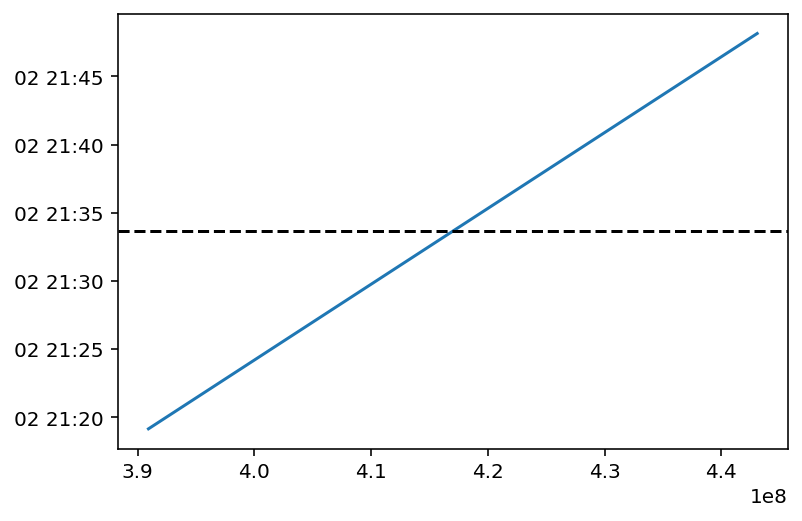

In [256]:
plt.plot(continuous_time.trodestime, systime.values)
plt.axhline(systime.mean(), color='black', linestyle='--')

In [259]:
midpoint = systime.mean()
estimated_sampling_rate = np.mean(np.diff(systime))
n_samples = len(systime)
n_samples // 2

26079728

In [273]:
midpoint + (np.arange(n_samples) * estimated_sampling_rate)

UFuncTypeError: ufunc 'add' cannot use operands with types dtype('O') and dtype('<m8[ns]')

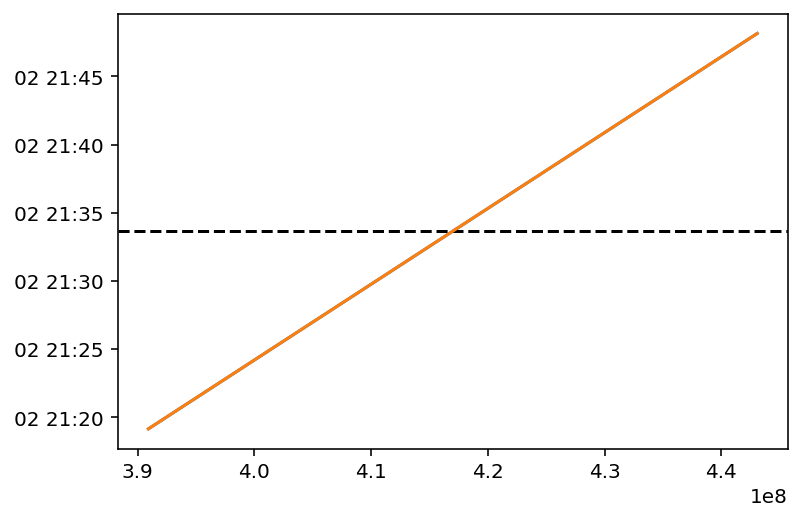

In [289]:
end_time = midpoint + estimated_sampling_rate * (n_samples  - (n_samples // 2))
start_time = midpoint - estimated_sampling_rate * (n_samples // 2)
adjusted_timestamps = pd.date_range(start=start_time, end=end_time, periods=n_samples)

plt.plot(continuous_time.trodestime, systime.values)
plt.axhline(systime.mean(), color='black', linestyle='--')
plt.plot(continuous_time.trodestime, adjusted_timestamps)

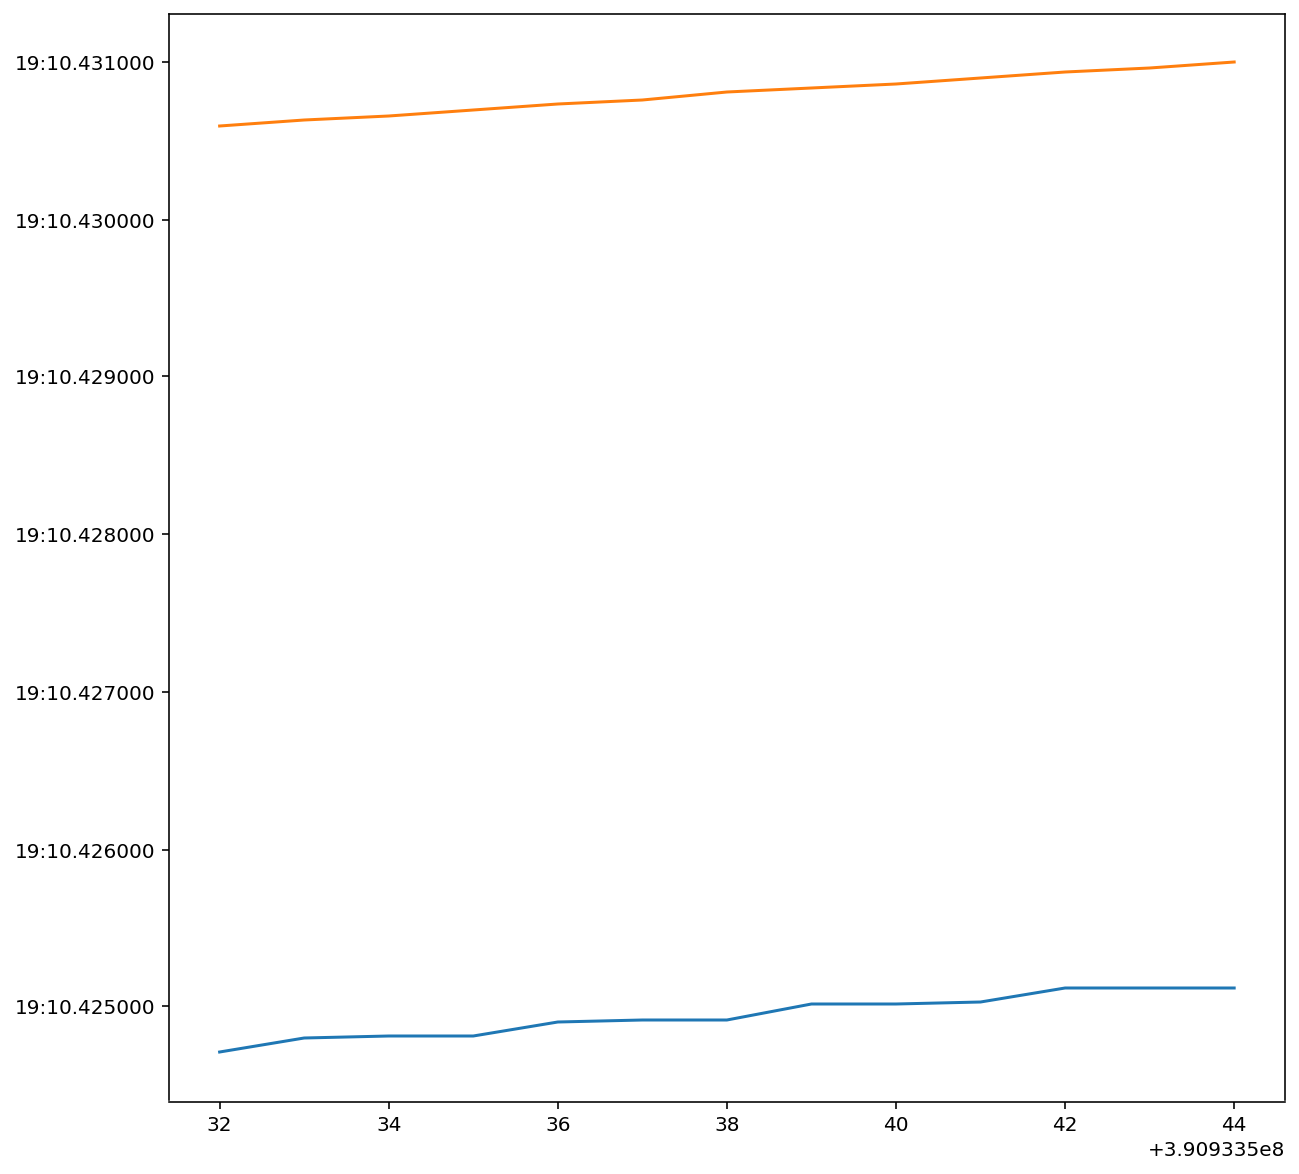

In [307]:
time_slice = slice(10000, 10000 + 13)

plt.figure(figsize=(10, 10))
plt.plot(continuous_time.trodestime.values[time_slice], systime.values[time_slice])
plt.plot(continuous_time.trodestime.values[time_slice], adjusted_timestamps[time_slice])


In [332]:
adjusted_timestamps.astype(int).values

array([1567459150097268048, 1567459150097301381, 1567459150097334714, ...,
       1567460888728348229, 1567460888728381562, 1567460888728414896])

In [337]:
def adjust_timestamps(systime):
    systime = pd.to_datetime(systime)
    midpoint = systime.mean()
    estimated_sampling_rate = np.mean(np.diff(systime))
    n_samples = len(systime)

    end_time = midpoint + estimated_sampling_rate * (n_samples  - (n_samples // 2))
    start_time = midpoint - estimated_sampling_rate * (n_samples // 2)

    return pd.date_range(start=start_time, end=end_time, periods=n_samples).astype(int)

ct = continuous_time.assign(adjusted_systime=lambda df: adjust_timestamps(df.systime))
ct

,trodestime,systime,time_chunk_label,adjusted_systime
0,390923532,1567459150091663430,0,1567459150097268048
1,390923533,1567459150091671120,0,1567459150097301381
2,390923534,1567459150091674111,0,1567459150097334714
3,390923535,1567459150091676962,0,1567459150097368047
4,390923536,1567459150091679726,0,1567459150097401380
...,...,...,...,...
52159451,443082983,1567460888733526586,0,1567460888728281563
52159452,443082984,1567460888733528880,0,1567460888728314896
52159453,443082985,1567460888733625293,0,1567460888728348229
52159454,443082986,1567460888733629636,0,1567460888728381562


In [444]:
def insert_new_data(data_file, df):

    new_data_file = data_file.copy()
    new_data_file['data'] = np.asarray(df.to_records(index=False))
    new_data_file['Fields'] = ''.join(
        [f'<{name} {dtype}>'
         for name, (dtype, _) in new_data_file['data'].dtype.fields.items()])
    
    return new_data_file


filename = '../test_data/lotus/preprocessing/20190902/20190902_lotus_06_r3.time/20190902_lotus_06_r3.continuoustime.dat'
data_file = readTrodesExtractedDataFile(filename)

new_data = (pd.DataFrame(data_file['data'])
            .assign(time_chunk_label=lambda df: label_time_chunks(df.trodestime))
            .assign(adjusted_systime=lambda df: adjust_timestamps(df.systime)))

new_data_file = insert_new_data(data_file, new_data)
 #     write_trodes_extracted_datafile(filename, new_data_file)
new_data_file

{'Description': 'Continuous time periods (start and end times)',
 'Byte_order': 'little endian',
 'Original_file': '20190902_lotus_06_r3.rec',
 'Clockrate': '30000',
 'System_time_at_creation': '1567459146943',
 'Timestamp_at_creation': '390829088',
 'Trodes_version': '1.8.2',
 'Compile_date': 'May 16 2019',
 'Compile_time': '10:32:19',
 'QT_version': '5.9.8',
 'Commit_tag': 'heads/Release_1.8.2-0-g9a3e37c',
 'Controller_firmware': '0.0',
 'Headstage_firmware': '3.9',
 'AutoSettle': '0',
 'SmartRef': '0',
 'Gyro': '0',
 'Accelerometer': '0',
 'Magnetometer': '0',
 'Time_offset': '0',
 'Fields': '<trodestime uint32><systime int64><time_chunk_label int64><adjusted_systime int64>',
 'data': array([(390923532, 1567459150091663430, 0, 1567459150097268048),
        (390923533, 1567459150091671120, 0, 1567459150097301381),
        (390923534, 1567459150091674111, 0, 1567459150097334714), ...,
        (443082985, 1567460888733625293, 0, 1567460888728348229),
        (443082986, 156746088873362

In [390]:
dtypes = np.asarray(ct.to_records(index=False)).dtype
dtypes

dtype((numpy.record, [('trodestime', '<u4'), ('systime', '<i8'), ('time_chunk_label', '<i8'), ('adjusted_systime', '<i8')]))

In [407]:
[f'<{name} {dtype}>' for name, dtype in dtypes.descr]

['<trodestime <u4>',
 '<systime <i8>',
 '<time_chunk_label <i8>',
 '<adjusted_systime <i8>']

In [413]:
dtypes.descr[0][1]

'<u4'

'<trodestime uint32><systime int64><time_chunk_label int64><adjusted_systime int64>'

In [359]:
data_file['data']

numpy.ndarray

(array([534., 260., 117.,  47.,  24.,   6.,   6.,   2.,   2.,   2.]),
 array([2.83191057e-04, 7.91325640e-01, 1.58236809e+00, 2.37341054e+00,
        3.16445299e+00, 3.95549543e+00, 4.74653788e+00, 5.53758033e+00,
        6.32862278e+00, 7.11966523e+00, 7.91070768e+00]),
 <a list of 10 Patch objects>)

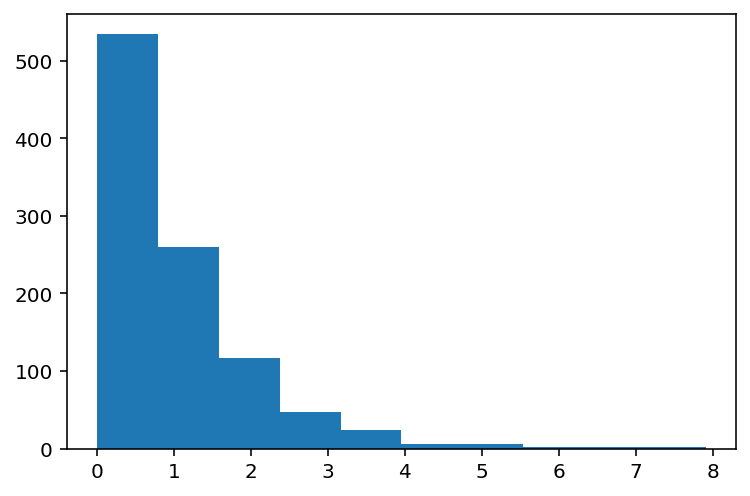

In [328]:
from scipy.stats import poisson, expon

plt.hist(expon.rvs(size=1000))

In [7]:
continuous_time

,trodestime,systime
0,390923532,1567459150091663430
1,390923533,1567459150091671120
2,390923534,1567459150091674111
3,390923535,1567459150091676962
4,390923536,1567459150091679726
...,...,...
52159451,443082983,1567460888733526586
52159452,443082984,1567460888733528880
52159453,443082985,1567460888733625293
52159454,443082986,1567460888733629636


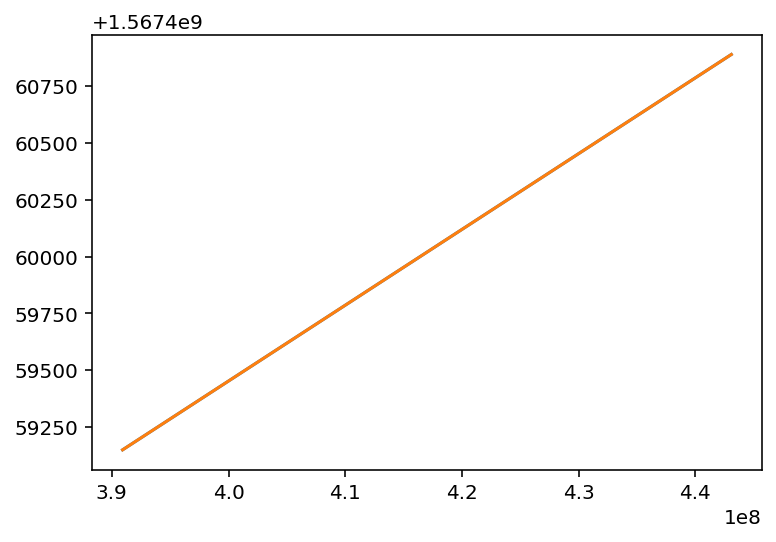

In [7]:
from sklearn.linear_model import LinearRegression

l = LinearRegression()
X = continuous_time.trodestime.values[:, np.newaxis]
y = continuous_time.systime / 1E9
l.fit(X, y)
predicted_time = l.predict(X)
plt.plot(continuous_time.trodestime.values, predicted_time)
plt.plot(continuous_time.trodestime.values, y)

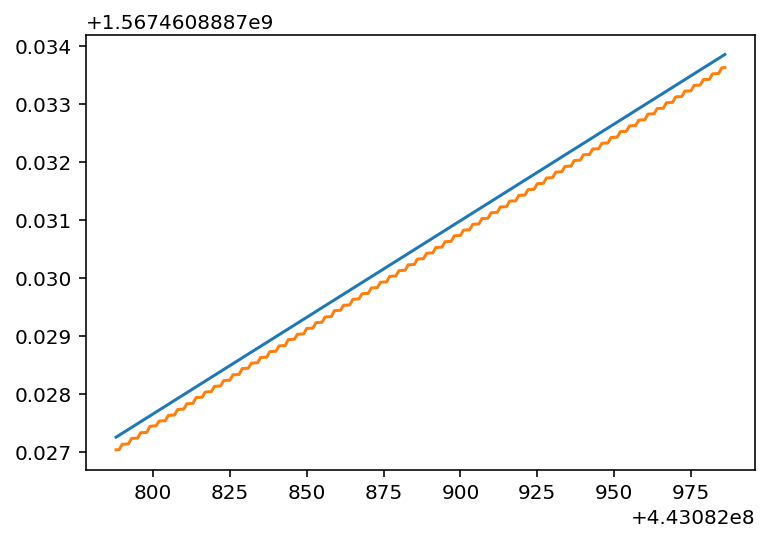

In [12]:
time_slice = slice(-200, -1)

plt.plot(continuous_time.trodestime.values[time_slice ], predicted_time[time_slice ])
plt.plot(continuous_time.trodestime.values[time_slice ], y[time_slice ])

In [11]:
l.coef_

array([3.33332105e-05])

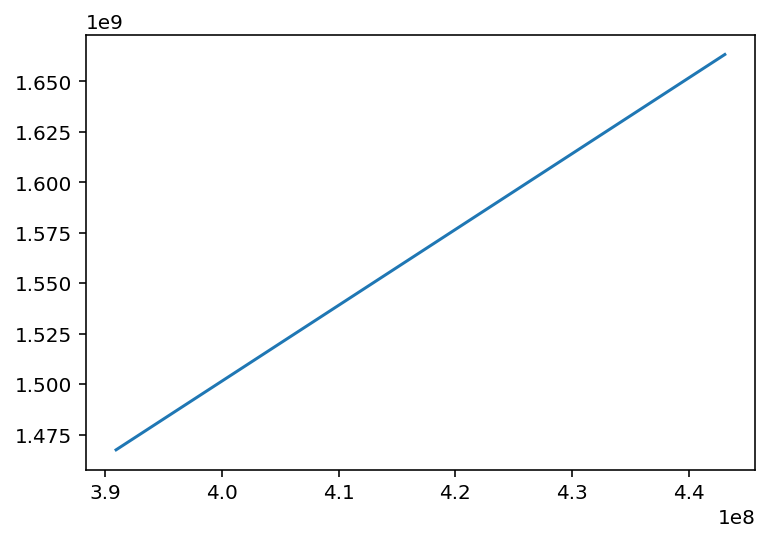

In [8]:
plt.plot(continuous_time.trodestime.values, l.predict(X))

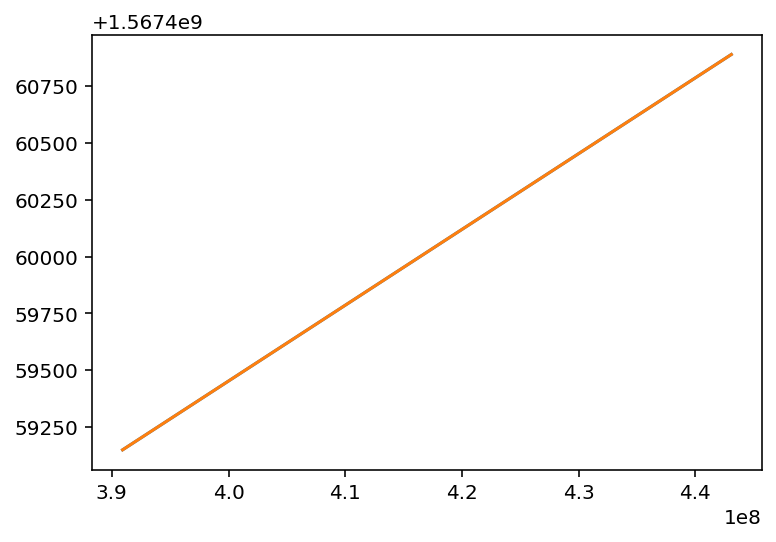

In [6]:
from scipy.stats import linregress

x = continuous_time.trodestime.values.astype(float)
y = continuous_time.systime.values / 1E9
slope, intercept, r_value, p_value, std_err = linregress(x, y)
predicted_time = intercept + slope * x
plt.plot(x, y, label='original data')
plt.plot(x, predicted_time, label='fitted line')

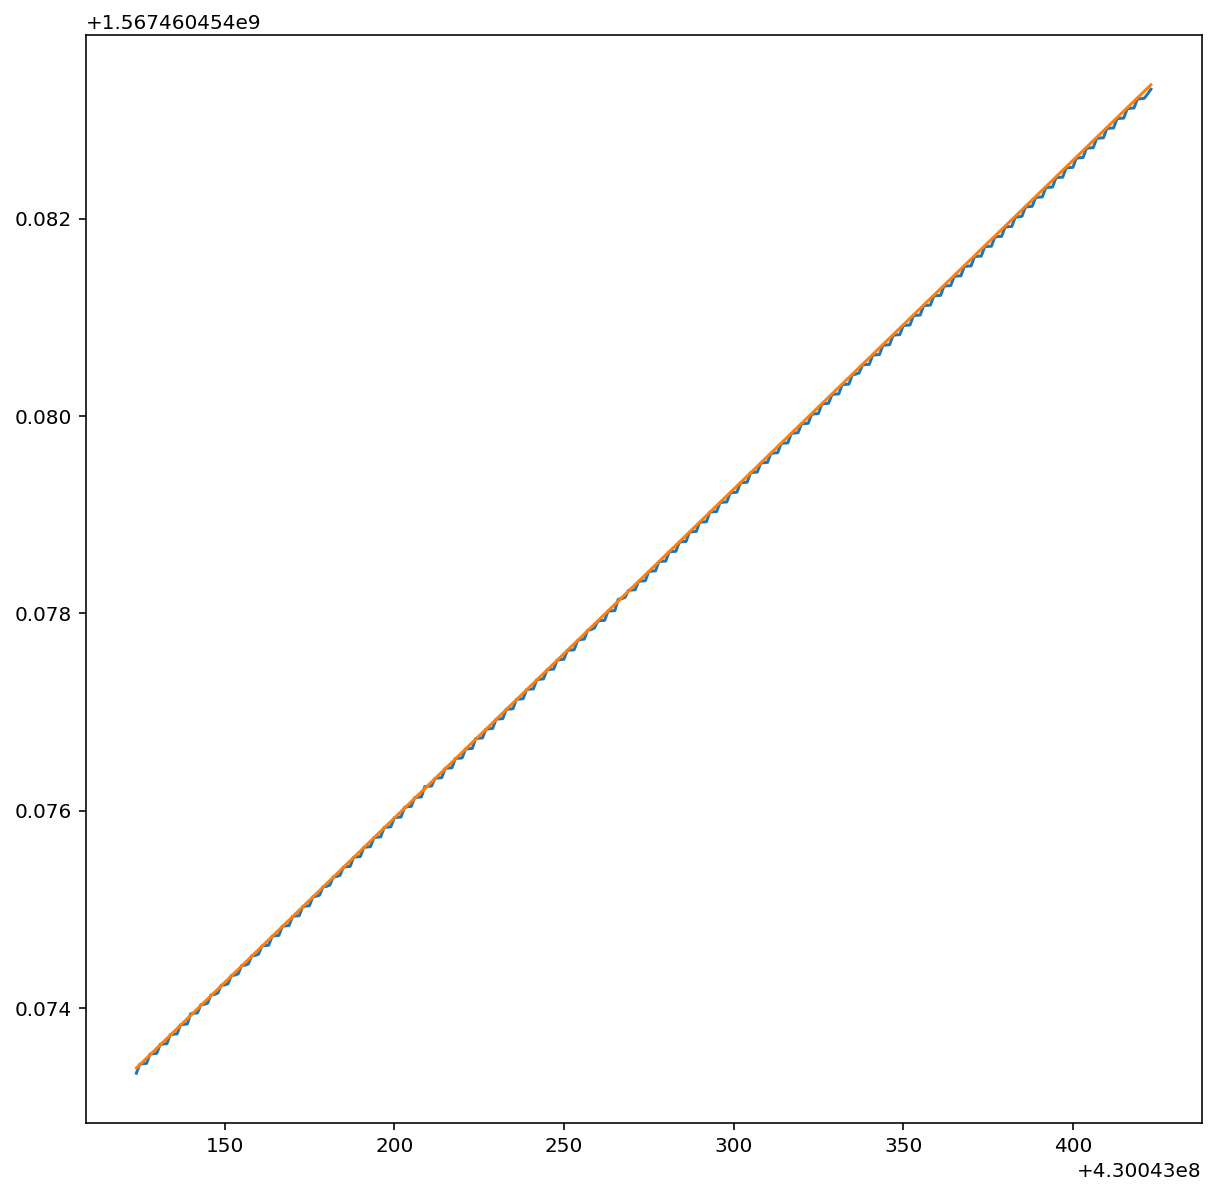

In [42]:
time_slice = slice(3 * 52159456 // 4, (3 * 52159456 // 4) + 300)

plt.figure(figsize=(10, 10))
plt.plot(x[time_slice], y[time_slice], label='original data')
plt.plot(x[time_slice], predicted_time[time_slice], label='fitted line')

Text(0.5, 1.0, 'Residuals')

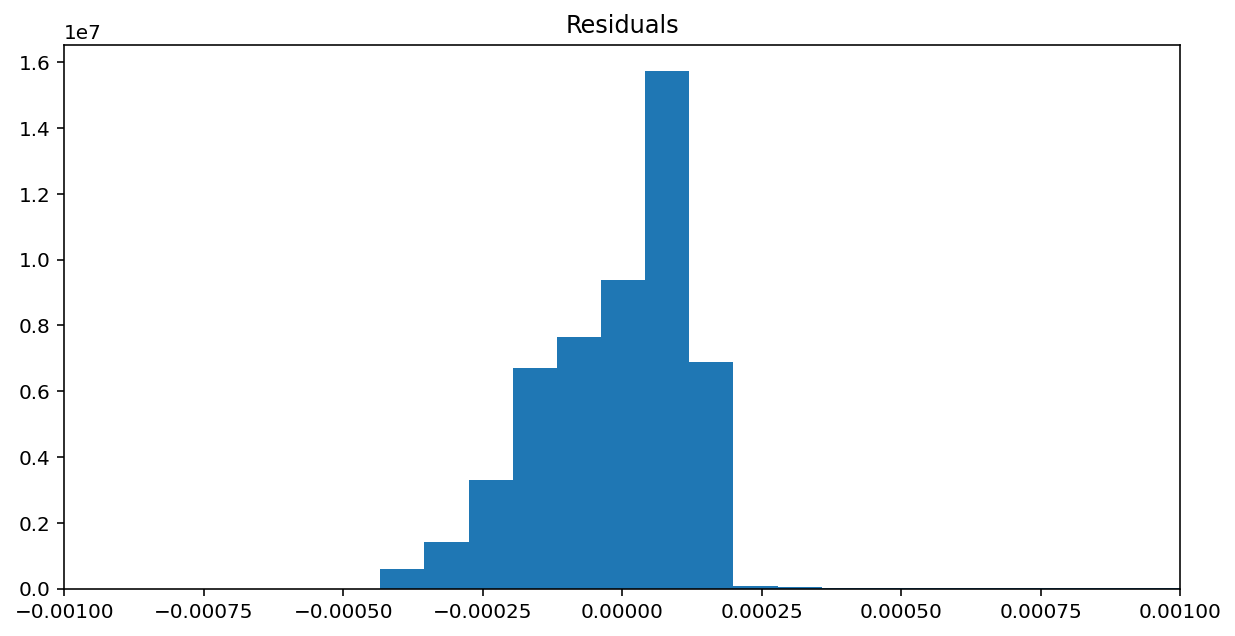

In [119]:
plt.figure(figsize=(10, 5))
plt.hist(y - predicted_time, bins=200);
plt.xlim((-0.001, 0.001))
plt.title('Residuals')

In [122]:
np.max(np.abs(y - predicted_time)) * 1000

15.391111373901367

In [32]:
np.diff(predicted_time) * 1E9

array([33140.18249512, 33378.60107422, 33378.60107422, ...,
       33140.18249512, 33378.60107422, 33378.60107422])

In [34]:
1 / 30000 * 1E9

33333.333333333336

In [36]:
x.shape

(52159456,)

In [48]:
blah = (ct - pd.Timestamp("1970-01-01")) // pd.Timedelta('1s')

In [74]:
pd.Series(ct) // pd.Timedelta('1s')

TypeError: cannot perform __floordiv__ with this index type: DatetimeArray

In [102]:
from scipy.stats import linregress


def label_time_chunks(time_index):
    time_index = np.asarray(time_index)
    is_gap = np.diff(time_index) > 1
    is_gap = np.insert(is_gap, 0, False)
    return np.cumsum(is_gap)


def _regress_timestamps(trodestime, systime):
    NANOSECONDS_TO_SECONDS = 1E9

    # Convert
    systime_seconds = np.asarray(systime).astype(
        np.float64) / NANOSECONDS_TO_SECONDS
    trodestime_index = np.asarray(trodestime).astype(np.float64)

    slope, intercept, r_value, p_value, std_err = linregress(
        trodestime_index, systime_seconds)
    adjusted_timestamps = intercept + slope * trodestime_index
    return (adjusted_timestamps * NANOSECONDS_TO_SECONDS).astype(np.int64)


def insert_new_data(data_file, df):

    new_data_file = data_file.copy()
    new_data_file['data'] = np.asarray(df.to_records(index=False))
    new_data_file['Fields'] = ''.join(
        [f'<{name} {dtype}>'
         for name, (dtype, _) in new_data_file['data'].dtype.fields.items()])
    
    return new_data_file


filename = '../test_data/lotus/preprocessing/20190902/20190902_lotus_06_r3.time/20190902_lotus_06_r3.continuoustime.dat'
data_file = readTrodesExtractedDataFile(filename)

new_data = (pd.DataFrame(data_file['data'])
            .assign(time_chunk_label=lambda df: label_time_chunks(df.trodestime))
            .assign(adjusted_systime=lambda df: _regress_timestamps(df.trodestime, df.systime)))

new_data_file = insert_new_data(data_file, new_data)
 #     write_trodes_extracted_datafile(filename, new_data_file)
new_data_file

{'Description': 'Continuous time periods (start and end times)',
 'Byte_order': 'little endian',
 'Original_file': '20190902_lotus_06_r3.rec',
 'Clockrate': '30000',
 'System_time_at_creation': '1567459146943',
 'Timestamp_at_creation': '390829088',
 'Trodes_version': '1.8.2',
 'Compile_date': 'May 16 2019',
 'Compile_time': '10:32:19',
 'QT_version': '5.9.8',
 'Commit_tag': 'heads/Release_1.8.2-0-g9a3e37c',
 'Controller_firmware': '0.0',
 'Headstage_firmware': '3.9',
 'AutoSettle': '0',
 'SmartRef': '0',
 'Gyro': '0',
 'Accelerometer': '0',
 'Magnetometer': '0',
 'Time_offset': '0',
 'Fields': '<trodestime uint32><systime int64><time_chunk_label int64><adjusted_systime int64>',
 'data': array([(390923532, 1567459150091663430, 0, 1567459150091796480),
        (390923533, 1567459150091671120, 0, 1567459150091829504),
        (390923534, 1567459150091674111, 0, 1567459150091863040), ...,
        (443082985, 1567460888733625293, 0, 1567460888733822976),
        (443082986, 156746088873362

,trodestime,systime
0,390923532,1567459150091663430
1,390923533,1567459150091671120
2,390923534,1567459150091674111
3,390923535,1567459150091676962
4,390923536,1567459150091679726
...,...,...
52159451,443082983,1567460888733526586
52159452,443082984,1567460888733528880
52159453,443082985,1567460888733625293
52159454,443082986,1567460888733629636


In [116]:
continuous_time

{'Description': 'Continuous time periods (start and end times)',
 'Byte_order': 'little endian',
 'Original_file': '20190902_lotus_06_r3.rec',
 'Clockrate': '30000',
 'System_time_at_creation': '1567459146943',
 'Timestamp_at_creation': '390829088',
 'Trodes_version': '1.8.2',
 'Compile_date': 'May 16 2019',
 'Compile_time': '10:32:19',
 'QT_version': '5.9.8',
 'Commit_tag': 'heads/Release_1.8.2-0-g9a3e37c',
 'Controller_firmware': '0.0',
 'Headstage_firmware': '3.9',
 'AutoSettle': '0',
 'SmartRef': '0',
 'Gyro': '0',
 'Accelerometer': '0',
 'Magnetometer': '0',
 'Time_offset': '0',
 'Fields': '<trodestime uint32><systime int64>',
 'data': array([(390923532, 1567459150091663430), (390923533, 1567459150091671120),
        (390923534, 1567459150091674111), ...,
        (443082985, 1567460888733625293), (443082986, 1567460888733629636),
        (443082987, 1567460888733631849)],
       dtype=[('trodestime', '<u4'), ('systime', '<i8')])}